In [1]:
# Esta parte es para los temas que utilizo así que comentelos
from jupyterthemes import jtplot
jtplot.style()

In [2]:
from libMLP import generateSets
from libMLP import modMLP
from libMLP import fitMLP
from libMLP import sMAPE
from libMLP import mAPE
from libMLP import graphPrediction
from libMLP import plotHistory
from libMLP import trainNoise
import numpy as np
import pandas as pd
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)
set_random_seed(42)

Using TensorFlow backend.


In [3]:
import os
comando = "PowerShell -Command \"Add-Type -AssemblyName System.Speech; (New-Object System.Speech.Synthesis.SpeechSynthesizer).Speak('trabajo terminado');\" "

In [4]:
m = 7
minimo = 13.2
maximo = 29

## Lectura de datos

In [44]:
nombre = '1_temperature'
#nombre = '2_temperature_subsampled'
#nombre = '3_passengers'
#nombre = '4_irradiance'
#nombre = '5_irradiance_subsampled'
#nombre = '6_sunspots'
#nombre = '7_distribution_subsampled_norm'
#nombre = '8_active_power'
matrizDiseño = pd.read_csv('MatDis/'+nombre+'_Matrix.csv')

matrizDiseño.shape

(1524, 8)

## División y estandarización de datos

In [42]:
X_train, X_val, X_test, y_train, y_val, y_test=generateSets(matrizDiseño, test_siz=0.3, val_size=0.2)

## Ruido (en las pruebas que sea necesario)

In [43]:
X_train_e, y_train_e = trainNoise('MatDis/'+nombre+'_All.csv',X_train.copy(), y_train.copy(), SNR_dB=35, NUMREP=7)
print(X_train.shape)
print(X_train_e.shape)

(19096, 13)
(152768, 13)


## MLP

In [8]:
neuronas = [128,256, 512, 512, 256, 256]   # Número de neuronas por capa
activations = ['relu', 'relu', 'relu', 'relu', 'relu', 'relu'] # funciónes de activación de cada capa

model = modMLP(neuronas, activations, m)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
________________________________________

## Entrenamiento

In [9]:
%%time
history = fitMLP(model, X_train_e, y_train_e, X_val, y_val, X_test, y_test, epoc=100, patien=-1)
os.system(comando)

Train on 6816 samples, validate on 214 samples
Epoch 1/100
6816/6816 [==============================] - 1s 141us/sample - loss: 0.0162 - mean_absolute_error: 0.0902 - mean_squared_error: 0.0162 - val_loss: 0.0091 - val_mean_absolute_error: 0.0765 - val_mean_squared_error: 0.0091
Epoch 2/100
6816/6816 [==============================] - 1s 95us/sample - loss: 0.0084 - mean_absolute_error: 0.0675 - mean_squared_error: 0.0084 - val_loss: 0.0063 - val_mean_absolute_error: 0.0583 - val_mean_squared_error: 0.0063
Epoch 3/100
6816/6816 [==============================] - 1s 94us/sample - loss: 0.0073 - mean_absolute_error: 0.0623 - mean_squared_error: 0.0073 - val_loss: 0.0056 - val_mean_absolute_error: 0.0586 - val_mean_squared_error: 0.0056
Epoch 4/100
6816/6816 [==============================] - 1s 94us/sample - loss: 0.0056 - mean_absolute_error: 0.0531 - mean_squared_error: 0.0056 - val_loss: 0.0056 - val_mean_absolute_error: 0.0528 - val_mean_squared_error: 0.0056
Epoch 5/100
6816/6816 [=

6816/6816 [==============================] - 1s 93us/sample - loss: 4.0673e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 4.0673e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0234 - val_mean_squared_error: 0.0011
Epoch 36/100
6816/6816 [==============================] - 1s 89us/sample - loss: 4.1836e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 4.1836e-04 - val_loss: 9.6331e-04 - val_mean_absolute_error: 0.0200 - val_mean_squared_error: 9.6331e-04
Epoch 37/100
6816/6816 [==============================] - 1s 89us/sample - loss: 0.0012 - mean_absolute_error: 0.0204 - mean_squared_error: 0.0012 - val_loss: 0.0033 - val_mean_absolute_error: 0.0398 - val_mean_squared_error: 0.0033
Epoch 38/100
6816/6816 [==============================] - 1s 91us/sample - loss: 0.0011 - mean_absolute_error: 0.0228 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_absolute_error: 0.0219 - val_mean_squared_error: 0.0012
Epoch 39/100
6816/6816 [==============================] -

6816/6816 [==============================] - 1s 92us/sample - loss: 2.8147e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.8147e-04 - val_loss: 7.4064e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 7.4064e-04
Epoch 69/100
6816/6816 [==============================] - 1s 87us/sample - loss: 3.8408e-04 - mean_absolute_error: 0.0123 - mean_squared_error: 3.8408e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0195 - val_mean_squared_error: 0.0011
Epoch 70/100
6816/6816 [==============================] - 1s 92us/sample - loss: 4.1920e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 4.1920e-04 - val_loss: 0.0021 - val_mean_absolute_error: 0.0245 - val_mean_squared_error: 0.0021
Epoch 71/100
6816/6816 [==============================] - 1s 89us/sample - loss: 0.0010 - mean_absolute_error: 0.0214 - mean_squared_error: 0.0010 - val_loss: 0.0012 - val_mean_absolute_error: 0.0248 - val_mean_squared_error: 0.0012
Epoch 72/100
6816/6816 [=========================

458/458 [==============================] - 0s 61us/sample - loss: 5.3747e-04 - mean_absolute_error: 0.0145 - mean_squared_error: 5.3747e-04
Test loss: 0.0005374716936817035
Test mae: 0.01450584
Test mse: 0.00053747173
Wall time: 1min 11s


0

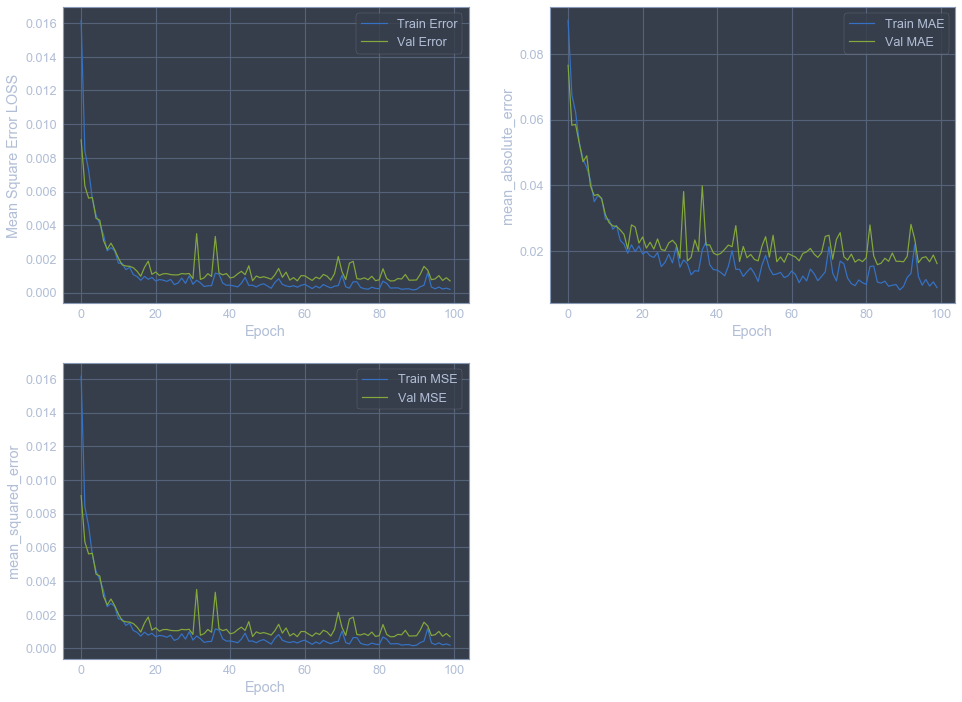

In [10]:
plotHistory(history)

In [17]:
h = history.history
history.history.hist['mean_absolute_error']

AttributeError: 'dict' object has no attribute 'hist'

## Predicción

In [11]:
y_predic= model.predict(X_test)

scaler = MinMaxScaler(feature_range=(minimo, maximo))
scaler.fit(y_test)

y_p = scaler.transform(y_predic)
y_t = scaler.transform(y_test)

In [12]:
print("SMAPE: ",sMAPE(y_t, y_p))
print("MAPE: ",mAPE(y_t, y_p))

SMAPE:  0.5788347578557753
MAPE:  1.1485422655021522


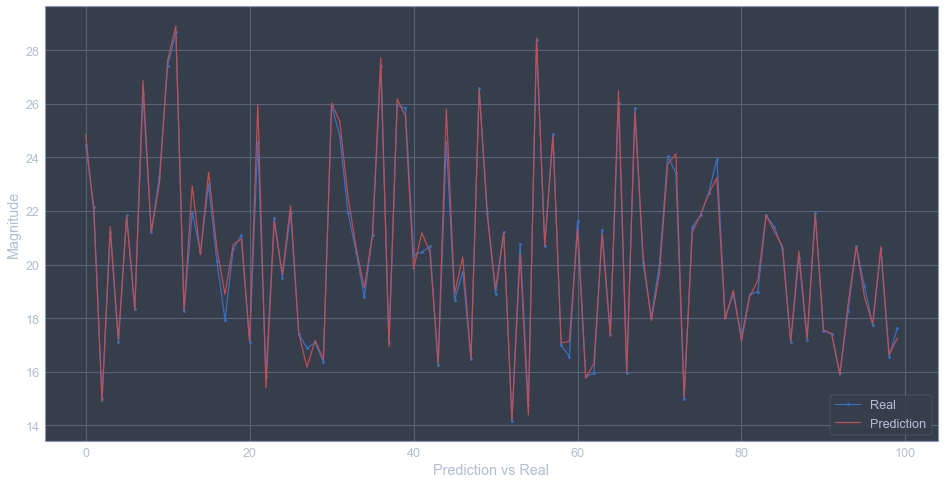

In [13]:
graphPrediction(y_t, y_p, samples=100)

In [14]:
model.save('modelo.h5')